# <center>Fast Food Classification</center>

# Context

Nutrition is essential for overall health and well-being, serving as the foundation for our physical and mental performance. A balanced diet provides the vital nutrients our bodies need to function optimally, supporting everything from immune system strength to energy levels and cognitive function. Proper nutrition can help prevent chronic diseases, promote healthy growth and development, and enhance our ability to cope with stress. Moreover, it plays a critical role in maintaining a healthy weight and improving mood, making it a key component of a healthy lifestyle. In nutrition, calories are the common unit of measurement for energy, they refer to the amount of energy that food provides when consumed. The daily requirement of calories for men between 2,200 and 3,000, and for women between 1,800 and 2,400  depending on on activity levels.

In this study we will consider 2000 kcal/day for women and 2500 kcal/day for men. A general rule of thumb is to distribute the daily caloric intake across three main meals as follows:

- Breakfast: 20-25% of the daily calories
- Lunch: 30-35% of the daily calories
- Dinner: 30-35% of the daily calories

For instance for a lunch or dinner meal, if we consider the 35%, a meal should give a 700 kcal for women and 875 kcal for men.

Other daily nutrition factors are considered in this study: 

- Proteins: About 46 grams for women and 56 grams for men, depending on activity levels, about 20-30 grams of protein per meal is common.
- Vitamin A: 700 mcg of retinol activity equivalents (RAE)  for women and 900 mcg RAE for men. A healthy meal could ideally provide around 20-30% of your daily vitamin A needs, which translates to about 140-270 mcg RAE per meal.
- Vitamin C: 75 mg for women and 90 mg for men. A healthy meal might aim to provide about 20-30% of your daily vitamin C needs, which would be around 15-27 mg per meal.
- Calcium: between 1,000 mg and 1,200 mg, A healthy meal could provide about 20-30% of your daily calcium needs, which translates to approximately 200-300 mg per meal.
- Fiber: About 25 grams for women and 38 grams for men. A healthy meal should ideally provide around 20-30% of your daily fiber needs, which would be about 5-10 grams of fiber per meal.
- Carbohydrates: 45-65% of total daily calories, about 225 to 325 grams of carbohydrates per day for women and about 281 to 406 grams of carbohydrates per day for men. A healthy meal might provide around 45-65 grams of carbohydrates, depending on your individual dietary needs and goals.

  
Some other unhealthy factors are also considered :

- Fats: 20-35% of total daily calories, or about 44 to 78 grams of fat for women and about 56 to 97 grams of fat for men per day. A healthy meal might contain around 10-20 grams of fat, depending on your overall dietary needs.
- Sodium: 2,300 mg per day, if we break it down per meal, we might aim for about 500 to 800 milligrams per meal.
- Cholesterol: The American Heart Association previously recommended limiting dietary cholesterol intake to 300 mg per day. 
- Sat fat: Less than 10% of total daily calories. For a 2,000-calorie diet, this is about 22 grams or less. Some health organizations recommend aiming for even lower intake, around 5-6% for those at risk of heart disease.
- Tranf fat: As low as possible. Many health organizations recommend limiting trans fat intake to less than 1% of total daily calories, which would be less than 2 grams for a 2,000-calorie diet. Some countries have banned trans fats altogether.
- Sugar:For women: No more than 6 teaspoons (about 25 grams) of added sugars per day.
        For men: No more than 9 teaspoons (about 38 grams) of added sugars per day.

According to these values, a healthy meal for lunch or dinner can be composed as in the table below, these values will serve as a reference* for us.

|Nutrition factors  | Women    | Men      |
|-------------------|----------|----------|
|Calories           | 700 kcal | 875 kcal |
|Proteins           | 20g      | 30g      |
|Vitamin A          | 140 mcg  | 180 mcg  |
|Vitamin C          | 15 mg    | 18 mg    |       
|Calcium            | 200 mg   | 200 mg   |
|Fiber              | 5 g      | 8 g      |
|Carbohydrates      | 45 g     | 57 g     |
|Fats               | 10 g     | 20 g     |
|Sat fat            | 20 g     | 25 g     |
|Tranf fat          | < 2 g    | < 2.5 g  |
|Cholesterol        | 100 mg   | 100 mg   |
|Sodium             | 650 mg   | 650 mg   |
|Sugar              | 8 g      | 12 g     |

The values in the data set represent the Daily Value (%DV) of meals for vitamin A, vitamin C, and calcium based on a 2,000-calorie diet. Therefore, we will consider a 20% percentage for these three factors as a reference for men and women.  

*We only considered these nutrition factors for this study as they represent the information given for the different meals in the dataset.

# Problem statement

In the fast food industry context, we aim to use clustering techniques to analyze the nutrition facts of various menu items from 8 fast food chains. The primary objective is to identify distinct groups of menu items based on their nutritional profiles, such as calorie content, fat, sugar, and sodium levels. This analysis will help consumers make informed dietary choices and enable restaurants to develop healthier options. However, we face challenges such as the high dimensionality of the nutritional data and the presence of outliers due to variability in portion sizes. The effectiveness of our clustering will be evaluated through silhouette scores and the coherence of identified clusters with known dietary guidelines.

# Import packages

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [202]:
df_food = pd.read_csv('./data/fastfood.csv')
df_food.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [203]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 68.5+ KB


# Cleaning the data

We start by removing any duplicates in the data

In [206]:
df_food.drop_duplicates(inplace=True)
df_food.info()

<class 'pandas.core.frame.DataFrame'>
Index: 513 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   513 non-null    object 
 1   item         513 non-null    object 
 2   calories     513 non-null    int64  
 3   cal_fat      513 non-null    int64  
 4   total_fat    513 non-null    int64  
 5   sat_fat      513 non-null    float64
 6   trans_fat    513 non-null    float64
 7   cholesterol  513 non-null    int64  
 8   sodium       513 non-null    int64  
 9   total_carb   513 non-null    int64  
 10  fiber        501 non-null    float64
 11  sugar        513 non-null    int64  
 12  protein      512 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  salad        513 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 72.1+ KB


Two observations were removed.

## Missing values

In [209]:
df_food.isnull().sum()

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          212
vit_c          208
calcium        208
salad            0
dtype: int64

The missing values will be imputed with the median.

In [211]:
df_food = df_food.fillna({'fiber':df_food['fiber'].median(),
                         'protein': df_food['protein'].median(),
                         'vit_a': df_food['vit_a'].median(),
                         'vit_c': df_food['vit_c'].median(),
                         'calcium': df_food['calcium'].median()
                         
                         })

In [212]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
Index: 513 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   513 non-null    object 
 1   item         513 non-null    object 
 2   calories     513 non-null    int64  
 3   cal_fat      513 non-null    int64  
 4   total_fat    513 non-null    int64  
 5   sat_fat      513 non-null    float64
 6   trans_fat    513 non-null    float64
 7   cholesterol  513 non-null    int64  
 8   sodium       513 non-null    int64  
 9   total_carb   513 non-null    int64  
 10  fiber        513 non-null    float64
 11  sugar        513 non-null    int64  
 12  protein      513 non-null    float64
 13  vit_a        513 non-null    float64
 14  vit_c        513 non-null    float64
 15  calcium      513 non-null    float64
 16  salad        513 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 72.1+ KB


## Explore the data

let's check the unique values for each column

In [214]:
df_food.select_dtypes(include='object').describe()

,restaurant,item,salad
count,513,513,513
unique,8,505,1
top,Taco Bell,Crispy Chicken Sandwich,Other
freq,113,3,513


the 'salad' column have the same value for all observations, it will be removed.

In [216]:
df_food.drop(columns=['salad'],inplace=True)

Let's explore the numeric columns in the data

In [218]:
df_food_num = df_food._get_numeric_data()
df_food_num.describe()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,531.111111,238.945419,26.604288,8.152047,0.462963,72.553606,1247.309942,45.647173,4.101365,7.272904,27.918129,15.196881,16.046784,22.884990
std,282.900251,166.683320,18.442620,6.431223,0.840615,63.259522,691.157795,24.924070,3.007390,6.770483,17.692499,24.417076,24.097008,19.810144
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,330.000000,120.000000,14.000000,4.000000,0.000000,35.000000,800.000000,28.000000,2.000000,3.000000,16.000000,10.000000,8.000000,15.000000
50%,490.000000,210.000000,23.000000,7.000000,0.000000,60.000000,1110.000000,44.000000,3.000000,6.000000,25.000000,10.000000,10.000000,20.000000
75%,690.000000,310.000000,35.000000,11.000000,1.000000,95.000000,1550.000000,57.000000,5.000000,9.000000,36.000000,15.000000,15.000000,25.000000
max,2430.000000,1270.000000,141.000000,47.000000,8.000000,805.000000,6080.000000,156.000000,17.000000,87.000000,186.000000,180.000000,400.000000,290.000000


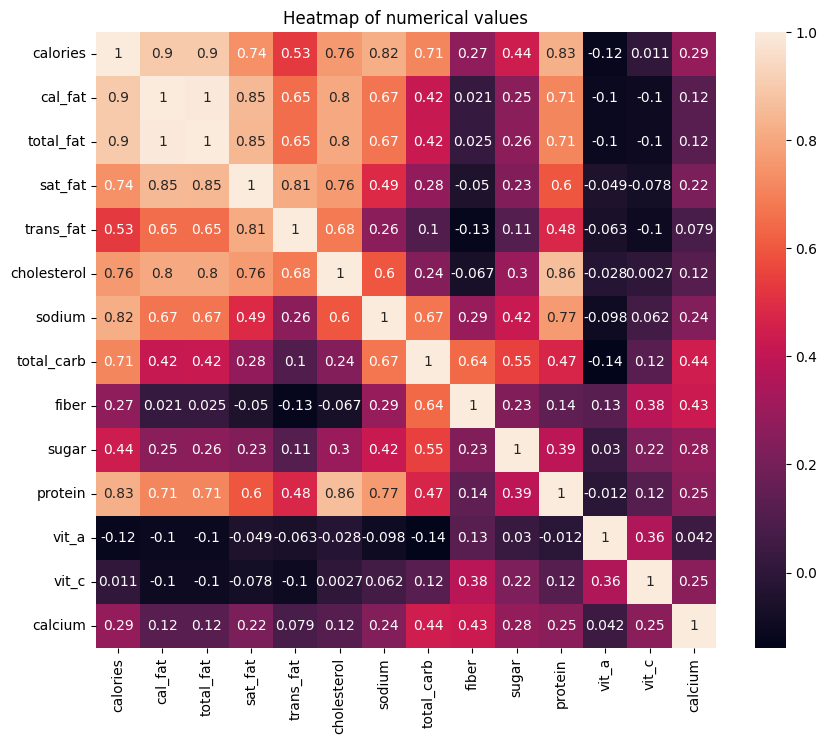

In [219]:
corr_matrix = df_food_num.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,annot=True)
plt.title('Heatmap of numerical values')
plt.show()

<Figure size 1000x800 with 0 Axes>

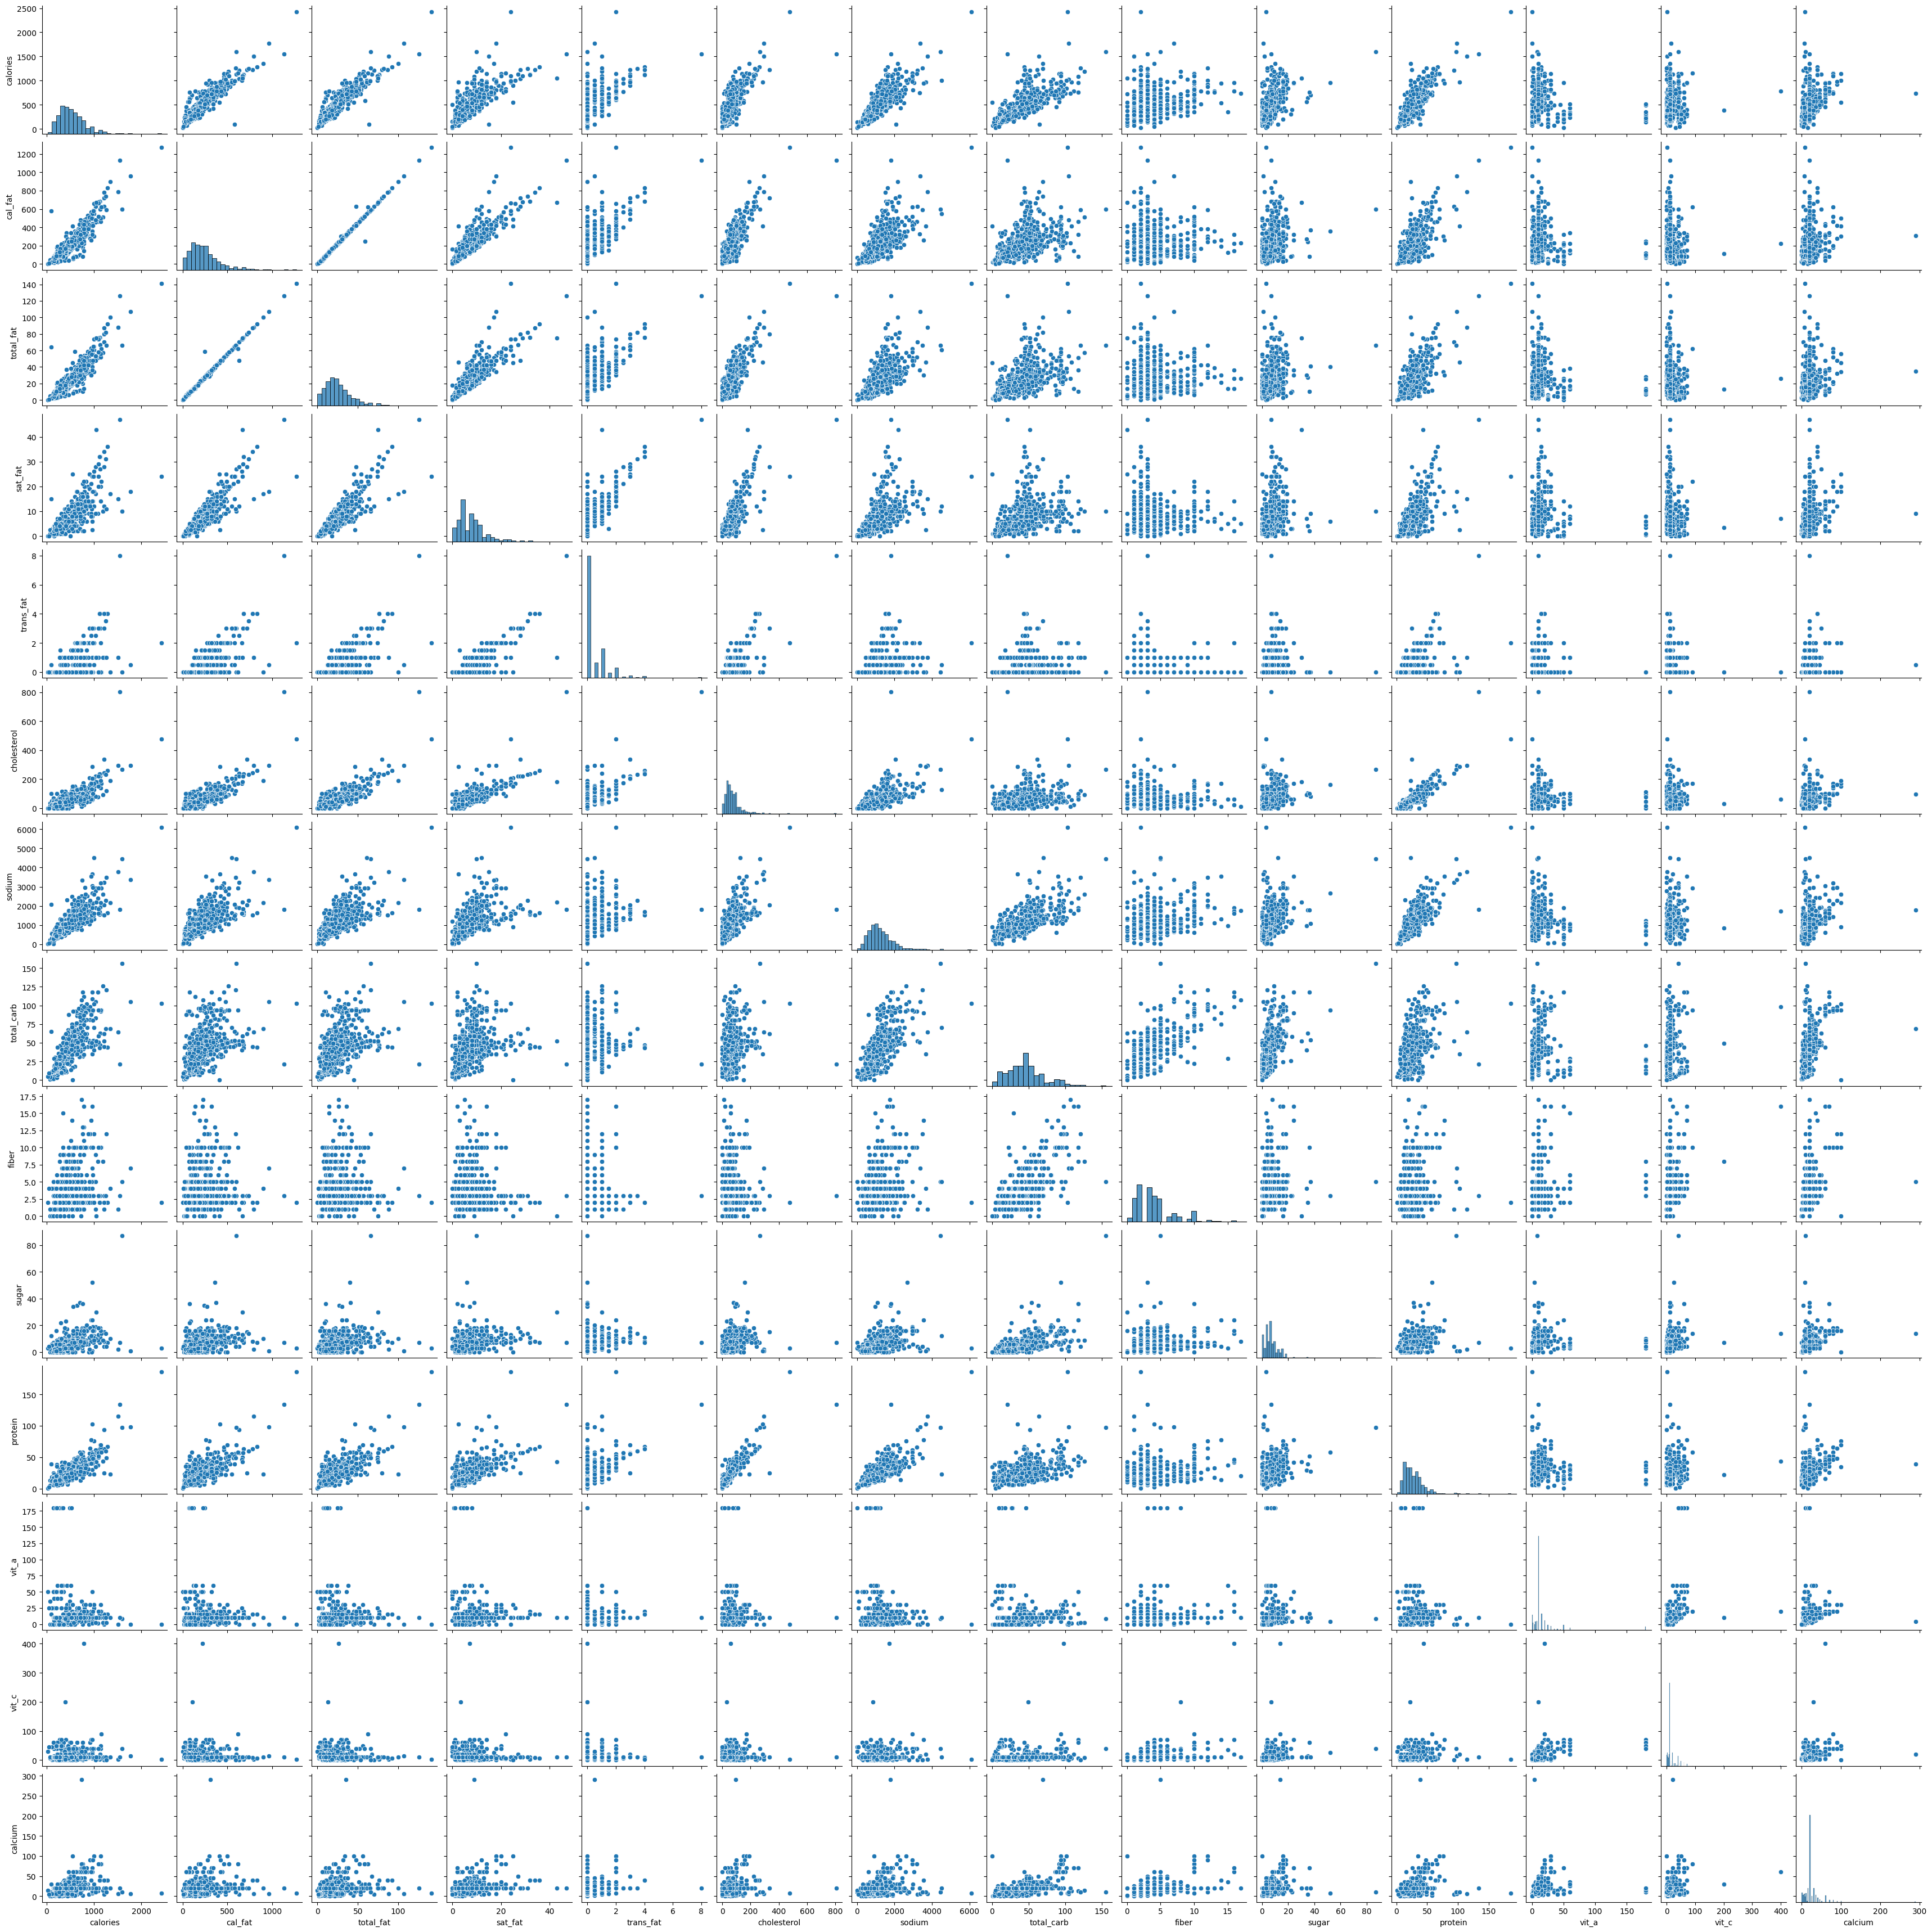

In [220]:
plt.figure(figsize=(10,8))
sns.pairplot(df_food)

There is a strong correlation between 'cal_fat' and 'total_fat' (equal to 1 in the correlation matrix) and the scatter plot shows an almost perfect alignment on the identity line. We will remove the 'cal_fat' column to eliminate the redundancy.

In [222]:
df_food.drop(columns=['cal_fat'],inplace=True)
df_food_num.drop(columns=['cal_fat'],inplace=True)

# Comparison of restaurants

## Calorie analysis

We first plot the distribution of calories in the different meals of the dataset.

<Axes: >

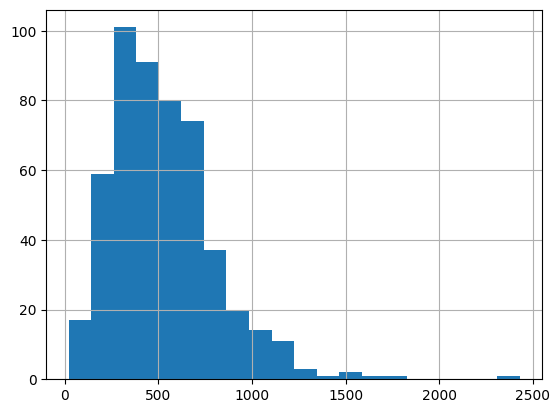

In [224]:
df_food_num['calories'].hist(bins=20)

In [225]:
print("Mean of calories: ",df_food_num['calories'].mean())
print("Median of calories: ",df_food_num['calories'].median())

Mean of calories:  531.1111111111111
Median of calories:  490.0


Then, we compare the different restaurants according to calories in their meals.

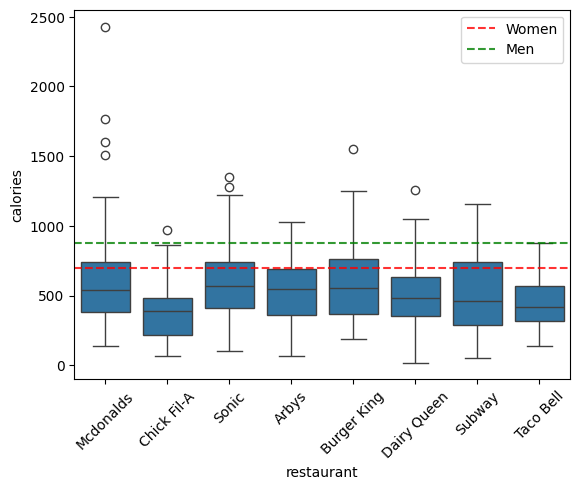

In [227]:
ax = sns.boxplot(x="restaurant", y="calories", data=df_food) 
plt.axhline(y=700, c="r", ls="--", alpha=0.8, label="Women")
plt.axhline(y=875, c="g", ls="--", alpha=0.8, label="Men")
plt.tick_params(axis='x', labelrotation=45)
plt.legend()
plt.show()

The different restaurants offer meals with similar number of calories, Subway seems to have a wider variety. Burger King and Sonic have the greatest median of calories among other retaurants. There are 4 meals in Mcdonals with relatively high calories.

Cosidering the reference lines for a healthy meal for a women and for a men, all restaurant medians are less than these reference values. The middle half of the meals at Taco Bell, Chick Fil-A, Arbys and Dairy Queen could be considered within the norms as they give less than the recommended calories per meal for women and men. All meals at Chick Fil-A and Taco Bell contain less calories than the recommended amount for men. 

Macdonalds has 4 of the 5 highest caloric meals in the data set.

In [229]:
df_food.sort_values(by='calories',ascending=False).head()

,restaurant,item,calories,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
39,Mcdonalds,20 piece Buttermilk Crispy Chicken Tenders,2430,141,24.0,2.0,475,6080,103,2.0,3,186.0,0.0,2.0,8.0
44,Mcdonalds,40 piece Chicken McNuggets,1770,107,18.0,0.5,295,3370,105,7.0,1,98.0,0.0,15.0,6.0
47,Mcdonalds,10 piece Sweet N' Spicy Honey BBQ Glazed Tenders,1600,66,10.0,0.0,265,4450,156,5.0,87,97.0,8.0,40.0,10.0
192,Burger King,American Brewhouse King,1550,126,47.0,8.0,805,1820,21,3.0,7,134.0,10.0,10.0,20.0
38,Mcdonalds,12 piece Buttermilk Crispy Chicken Tenders,1510,88,15.0,1.0,295,3770,64,1.0,2,115.0,0.0,2.0,6.0


## Unhealthy factors analysis

We will focus in this section on the amount of sodium, fat, cholesterol and sugar contained in meals from different restaurants.

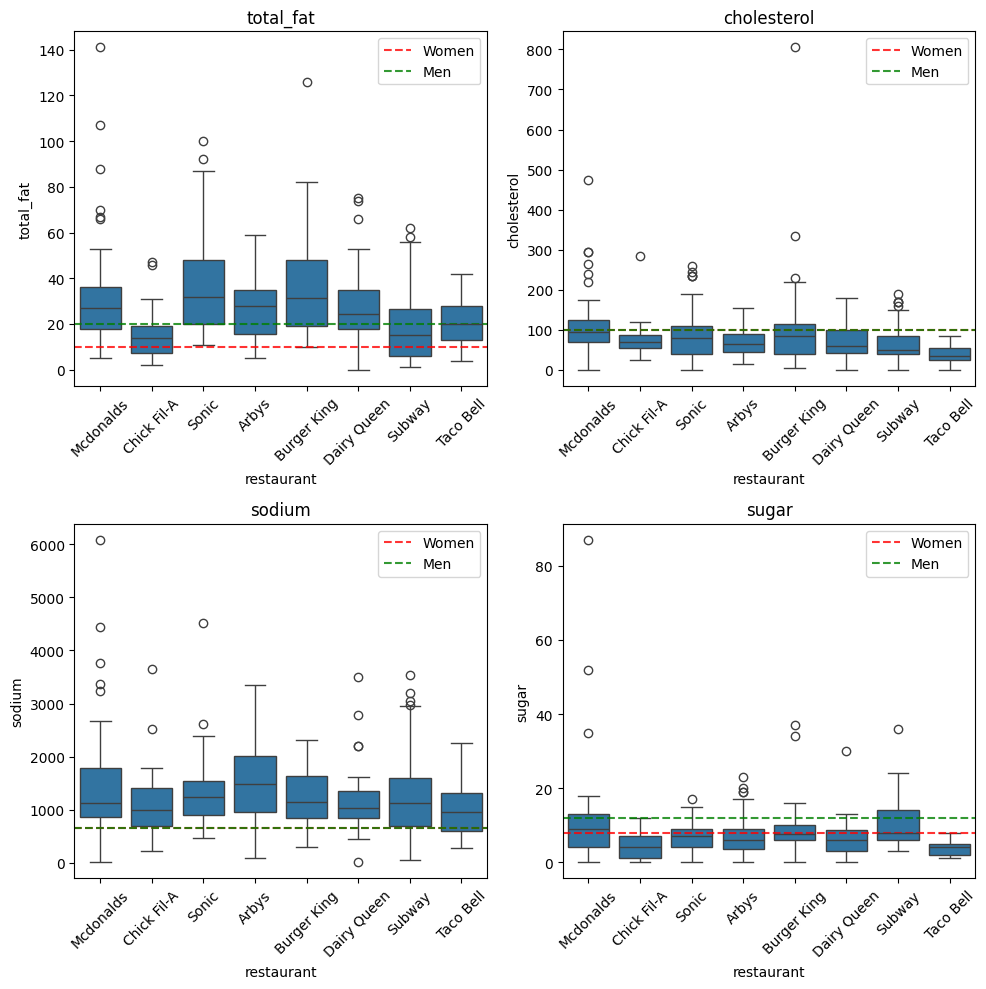

In [231]:
UH = ['total_fat', 'cholesterol','sodium','sugar']
male = [20, 100, 650, 12]
female = [10,100,650,8]


fig,axs = plt.subplots(2,2,figsize=(10,10))
i=0
j=0
for f in UH:
    sns.boxplot(x="restaurant", y=f, data=df_food, ax=axs[i,j%2]) 
    axs[i,j%2].axhline(y=female[j], c="r", ls="--", alpha=0.8, label="Women")
    axs[i,j%2].axhline(y=male[j], c="g", ls="--", alpha=0.8, label="Men")
    axs[i,j%2].set(title= f)
    axs[i,j%2].legend()
    axs[i,j%2].tick_params(axis='x', labelrotation=45)
    if j%2==1:
        i+=1
    j+=1

plt.tight_layout()
plt.show()

- All medians of total fat are above the reference value for women and only Chick-fil-A and Subway have total fat medians below the reference for men. Sonic and Burger King offer the highest-fat meals, The middle 50% of the fat values at these two restaurants are above the men's reference.  The highest-fat meal is at Mcdonald's.
  
- All meals at Taco Bell have less cholesterol than the reference. All medians of cholesterol are also below the reference. The middle 50% of the cholesterol values at Chick-fil-A, Arbys, and Subway are below the  reference. Burger King offers the meal with the highest cholesterol level.
  
- Almost all of the middle 50% of the sodium values in the different restaurants are above the reference line. Mcdonalds has also the meal with the highest sodium value.

- All medians of sugar value from the different restaurants are below the reference for men and women except for Mcdonalds with a median slightly above the reference for women. The most sugar-rich meal is also at Mcdonalds. All Taco Bell meals are low in sugar. The majority of the meals are slaty. 

## Healthy factors analysis

We will focus in this section on the amount of Fiber, protein, calcium, vitamin A and vitamin C contained in meals from different restaurants.

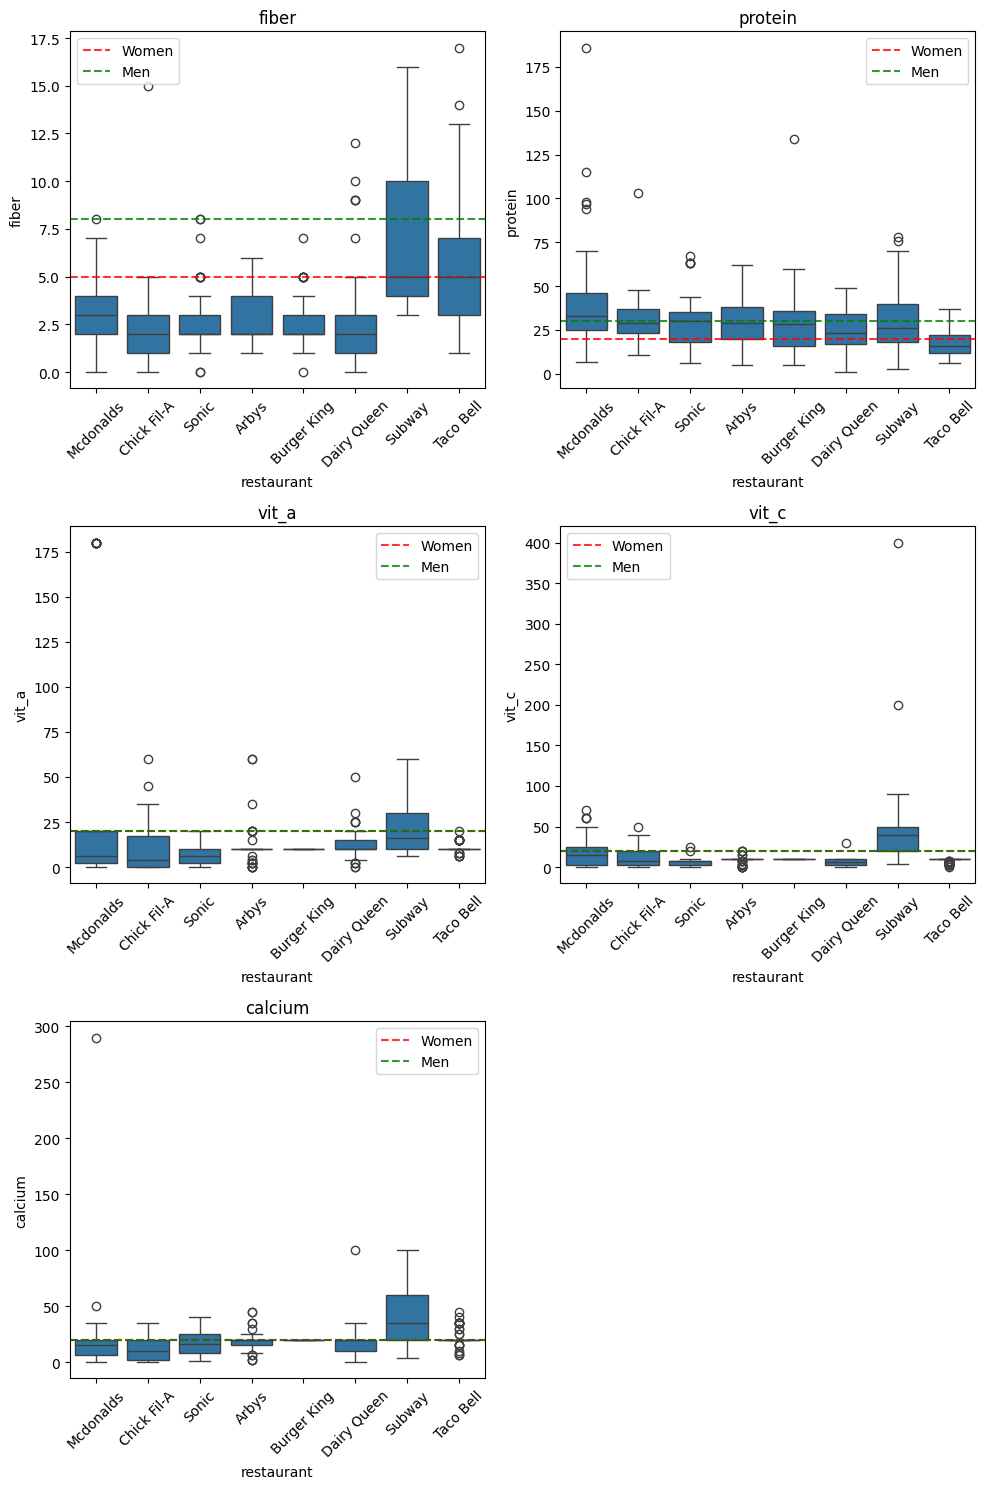

In [234]:
H = ['fiber', 'protein','vit_a','vit_c','calcium']
male = [8, 30, 20, 20, 20]
female = [5, 20, 20, 20, 20]


fig,axs = plt.subplots(3,2,figsize=(10,15))
i=0
j=0
for f in H:
    sns.boxplot(x="restaurant", y=f, data=df_food, ax=axs[i,j%2]) 
    axs[i,j%2].axhline(y=female[j], c="r", ls="--", alpha=0.8, label="Women")
    axs[i,j%2].axhline(y=male[j], c="g", ls="--", alpha=0.8, label="Men")
    axs[i,j%2].set(title= f)
    axs[i,j%2].legend()
    axs[i,j%2].tick_params(axis='x', labelrotation=45)
    if j%2==1:
        i+=1
    j+=1


for ax in axs.flatten():
    if not ax.has_data(): 
        ax.remove() 
plt.tight_layout()
plt.show()

- Most Taco Bell and Subway meals are high in fiber. All other restaurants have fiber values below the reference line for women, except for some meals at McDonald's and Arbys. the meals with the highest fiber value is at Tavo Bell.

- All restaurants have an acceptable rate of protein, the majority of meals contain meat and eggs.

-  All the percent values of vitamin A for the various meals are below the reference value of 20%, except for some Subway meals which have a higher vitamin A value. The same observation can be made for the vitamin C values. Arabys, Taco Bell and Burger King have the lowest rates of vitamin C.

-   The majority of restaurants have a median calcium value close to the reference value. The middle 50% of calcium values at Subway are above the reference.

## Removing the outliers

The analysis of the various nutrition factors of the different meals in the dataset shows numerous outliers  which can distort the subsequent process. In this section, we propose to identify these outliers and remove them. 

### Identifying outliers
We propose to use two methods, the first one is based on the IQR, we detect an outlier that falls outside of the expected ranges of $\pm$2*IQR and the second one is using z scores which involves calculating how many standard deviations a data point is from the mean. The Z-scores method assumes that the data follows a normal distribution, in our case this assumption is fulfilled as we can notice in the pairplot above. Points with z-scores greater than 3 or less than -3 are typically considered outliers.

#### IQR method

In [237]:
def detect_outliers_iqr(dataframe):
    outliers_IQR = []

    for column in dataframe.columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2 * IQR
        upper_bound = Q3 + 2 * IQR

        outliers_IQR.append(dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)])
    
    return outliers_IQR

# Detect outliers
outliers_IQR = detect_outliers_iqr(df_food_num)

#### Z scores method

In [239]:
from scipy.stats import zscore

# columns order: ['calories', 'total_fat', 'sat_fat', 'trans_fat', 'cholesterol', sodium', 'total_carb', 'fiber', 'sugar', 'protein', 'vit_a', 'vit_c', 'calcium']

df_zscores=pd.DataFrame()
outliers_zscores =[]

for f in df_food_num.columns:
    column_name = 'zscore_'+f
    df_zscores[column_name] = zscore(df_food[f])
    outliers_zscores.append(df_food_num[(df_zscores[column_name] > 3) | (df_zscores[column_name] < -3)])


We then perform intersection between the two method to detect the outliers.

In [241]:
intersection_outliers = []

for i in range(len(outliers_zscores)):
    intersection_outliers.append(pd.merge(outliers_IQR[i], outliers_zscores[i], how='inner',left_index=True,right_index=True))


### Deleting outliers
We next remove the identified outliers from the dataset, we first merge all the outliers from the different features and keep unique ones.

In [243]:
outliers_index=[]

for i in range(len(intersection_outliers)):
    outliers_index= outliers_index + intersection_outliers[i].index.values.tolist()

outliers_index = np.unique(outliers_index)
outliers_index

array([ 18,  37,  38,  39,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  69,  81,  98,  99, 100, 101, 102, 114, 115,
       122, 155, 192, 196, 198, 205, 211, 228, 229, 270, 279, 280, 309,
       311, 320, 322, 326, 332, 351, 354, 355, 362, 367, 412, 487])

We identifyied 51 outliers and we remove them from the dataset.

In [245]:
df_food.iloc[outliers_index]

,restaurant,item,calories,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
18,Mcdonalds,Crispy Maple Bacon Dijon Chicken Sandwich,740,35,9.0,0.5,95,1780,69,5.0,14,39.0,4.0,20.0,290.0
37,Mcdonalds,10 piece Buttermilk Crispy Chicken Tenders,1210,70,12.0,1.0,240,3230,52,1.0,4,94.0,0.0,0.0,4.0
38,Mcdonalds,12 piece Buttermilk Crispy Chicken Tenders,1510,88,15.0,1.0,295,3770,64,1.0,2,115.0,0.0,2.0,6.0
39,Mcdonalds,20 piece Buttermilk Crispy Chicken Tenders,2430,141,24.0,2.0,475,6080,103,2.0,3,186.0,0.0,2.0,8.0
44,Mcdonalds,40 piece Chicken McNuggets,1770,107,18.0,0.5,295,3370,105,7.0,1,98.0,0.0,15.0,6.0
45,Mcdonalds,4 piece Sweet N' Spicy Honey BBQ Glazed Tenders,640,27,4.0,0.0,105,1780,63,2.0,35,39.0,4.0,15.0,4.0
46,Mcdonalds,6 piece Sweet N' Spicy Honey BBQ Glazed Tenders,960,40,6.0,0.0,160,2670,94,3.0,52,58.0,4.0,25.0,8.0
47,Mcdonalds,10 piece Sweet N' Spicy Honey BBQ Glazed Tenders,1600,66,10.0,0.0,265,4450,156,5.0,87,97.0,8.0,40.0,10.0
48,Mcdonalds,Premium Asian Salad w/o Chicken,140,7,0.5,0.0,0,20,13,5.0,7,7.0,180.0,45.0,10.0
49,Mcdonalds,Premium Asian Salad w/ Grilled Chicken,270,9,1.0,0.0,80,740,18,5.0,10,31.0,180.0,70.0,10.0


In [246]:
df_food_num.drop(index=outliers_index ,inplace=True)
df_food.drop(index=outliers_index ,inplace=True)

In [247]:
df_food.reset_index(drop=True,inplace=True)
df_food_num.reset_index(drop=True,inplace=True)
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   462 non-null    object 
 1   item         462 non-null    object 
 2   calories     462 non-null    int64  
 3   total_fat    462 non-null    int64  
 4   sat_fat      462 non-null    float64
 5   trans_fat    462 non-null    float64
 6   cholesterol  462 non-null    int64  
 7   sodium       462 non-null    int64  
 8   total_carb   462 non-null    int64  
 9   fiber        462 non-null    float64
 10  sugar        462 non-null    int64  
 11  protein      462 non-null    float64
 12  vit_a        462 non-null    float64
 13  vit_c        462 non-null    float64
 14  calcium      462 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 54.3+ KB


# Meals Clustering
We will next cluster the meals in the dataset. We will compare two algorithms Kmeans and hierarchical clustering.

## Kmeans clustering
Here, we apply the K means algorithm to cluster the data. To select the best number of clusters K, we use the elbow method. We plot the inertia vs K
and choose the elbow point in the plot as the best value for K.

Inertia is a measure of how tightly the clusters are packed together, specifically, it represents the sum of squared distances between each point and its assigned cluster center (centroid). Lower inertia values indicate that the clusters are more compact and well-defined. We should therefore aim for the elbow point where the inertia starts to fall much more slowly.

Before applying KMeans, the data was scaled (the nutrition factors are in different units).

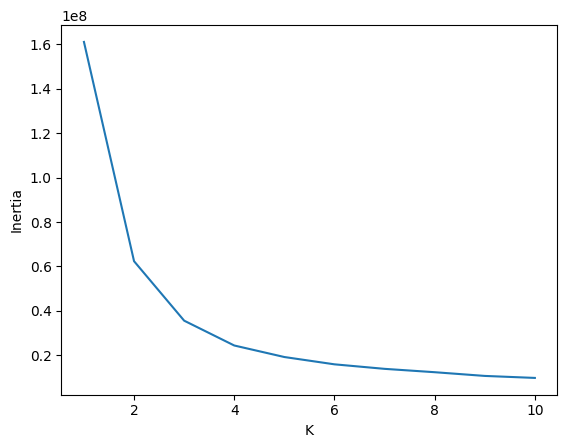

In [597]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore")

inertia=[]
clustering=[]
k_list = range(1,11)
X = np.array(df_food_num)

#scale the data

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_list:
    kmeans = KMeans(n_clusters=k,random_state=47)
    kmeans.fit(df_food_num)
    labels = kmeans.predict(X)
    cluster_centers = kmeans.cluster_centers_
    inertia.append(kmeans.inertia_)
    clustering.append(labels)

plt.plot(k_list,inertia)
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

We notice that starting from K=4, The inertia curve begins to descend slowly.

## Dimension reduction for visualization

We propose to apply PCA in order to be able to reduce the dimension from 13 to 2 and be able to visualize the data in a 2D plane.

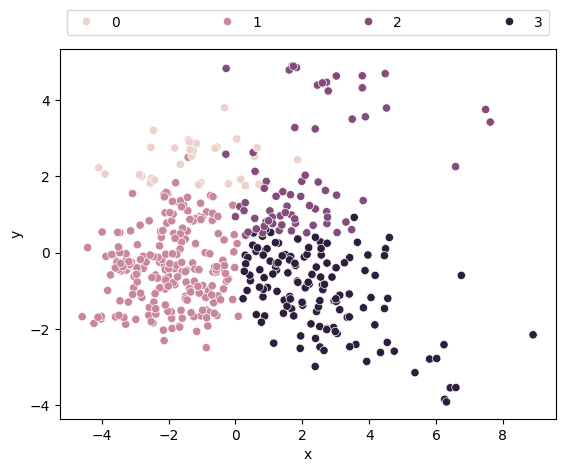

In [601]:
from sklearn.decomposition import PCA


clusterer = KMeans(n_clusters=4, random_state=47)
cluster_labels = clusterer.fit_predict(X)

pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X)

dict = {
 "cluster" : cluster_labels,
 "x" : X_pca[:, 0],
 "y" : X_pca[:, 1]
}
df_pca = pd.DataFrame(dict)

sns.scatterplot(x = 'x', y = 'y', data = df_pca, hue = 'cluster')
plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",mode='expand', ncol=4)
plt.show()

## Hierarchical Clustering

The second method to apply is hierarchical clustering. We vary the number of clusters k and compute the silhouette score. We choose the k giving the maximum score.

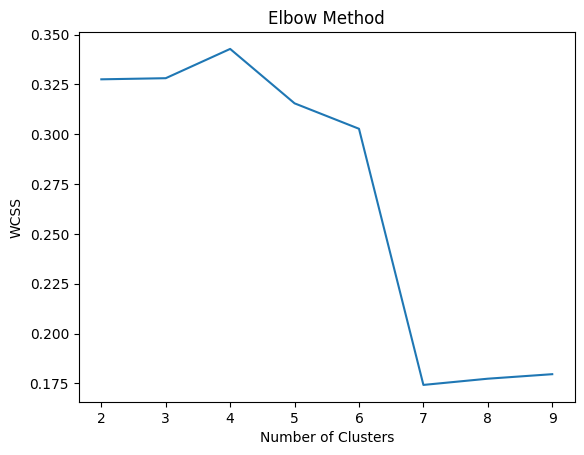

In [578]:
ss = []
for i in range(2, 10):  
    model = AgglomerativeClustering(n_clusters=i)
    cluster_labels = model.fit_predict(X)
    ss.append(silhouette_score(X, cluster_labels))

plt.plot(range(2, 10), ss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Similar to k means, the optimal clustering is obtained with a number of clusters equal to 4. We then propose to vary the way the distance between clusters is calculated known as the linking method. 

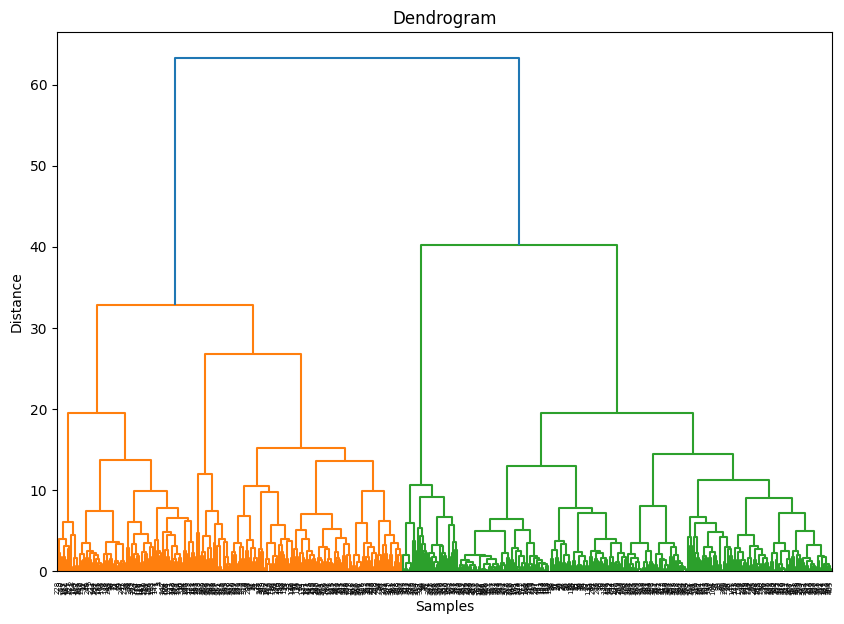

In [605]:
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

linkage_methods = ['ward', 'complete', 'average']
silhouette_scores = []

for link in linkage_methods:
    clustering = AgglomerativeClustering(n_clusters=4, linkage=link)  
    clusters = clustering.fit_predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    silhouette_scores.append(silhouette_avg)

max_index = np.argmax(silhouette_scores)

Z = linkage(X, method=linkage_methods[max_index])
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()



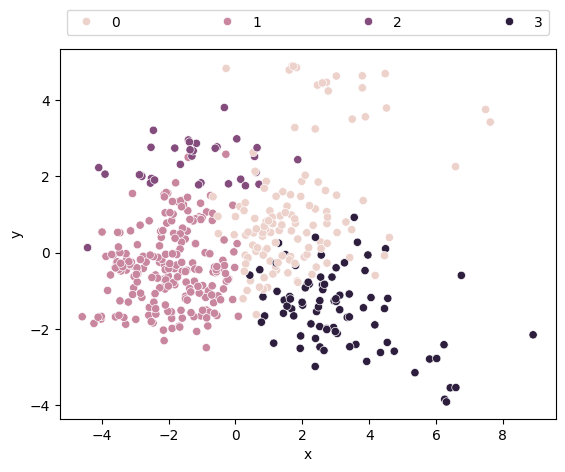

In [607]:
clustering = AgglomerativeClustering(n_clusters=4, linkage=linkage_methods[max_index])  
clusters = clustering.fit_predict(X)

dict_h = {
 "cluster" : clusters,
 "x" : X_pca[:, 0],
 "y" : X_pca[:, 1]
}

df_pca_h = pd.DataFrame(dict_h)

sns.scatterplot(x = 'x', y = 'y', data = df_pca_h, hue = 'cluster')
plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",mode='expand', ncol=4)
plt.show()

The two clusterings are close, we compute the Average Silhouette Score and the K means gives a better score, we will analyze the k means results in the following.

In [609]:
from sklearn.metrics import  silhouette_score
print(f"Kmeans Average Silhouette Score: {silhouette_score(X, cluster_labels)}")
print(f"Hierarchical Clustering Average Silhouette Score: {silhouette_score(X, clusters)}")

Kmeans Average Silhouette Score: 0.3381343291725097
Hierarchical Clustering Average Silhouette Score: 0.3153502573437945


In [611]:
df_food['cluster'] =cluster_labels

We first count the number of meals per cluster. Melas are divided into two main groups and two smaller ones.

In [613]:
counts = np.bincount(df_food['cluster'])
counts

array([ 32, 226,  70, 134], dtype=int64)

Let's look at the distribution of restaurants across the four groups:
- Cluster 0 includes mainly meals from Subway and a few from Chick-fil-A and Dairy Queen.
- Cluster 1 is the largest, and includes meals from all 8 restaurants. Taco Bell meals are the most present.
- Cluster 2 is composed mostly of Subway meals. Arbys and Burger King meals are absent from this cluster
- Cluster 3 also encompasses  meals from all 8 restaurants. Arbys and Burger King meals are the most prominent. 

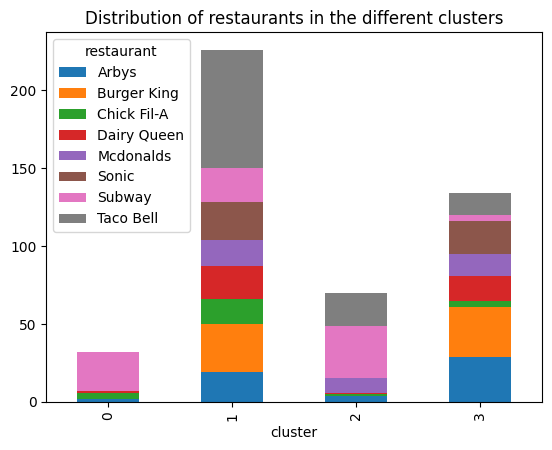

In [615]:
counts = df_food.groupby(['cluster','restaurant']).size().unstack()
counts.plot(kind='bar', stacked=True)
plt.title("Distribution of restaurants in the different clusters")
plt.show()

Next, we compute the mean of the nutrition factors in each cluster.

In [637]:
df_food_num['cluster'] =cluster_labels 
mean_df = df_food_num.groupby(['cluster']).mean()
mean_df


,calories,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
cluster,,,,,,,,,,,,,
0,251.562500,11.968750,4.046875,0.125000,51.406250,794.062500,16.687500,3.781250,6.531250,20.125000,41.562500,47.812500,12.062500
1,343.805310,16.092920,4.699115,0.163717,39.247788,811.415929,32.929204,3.057522,4.216814,17.048673,8.101770,8.495575,16.805310
2,675.000000,26.314286,7.928571,0.178571,71.214286,1610.285714,75.542857,7.614286,10.785714,34.328571,14.285714,22.271429,41.257143
3,692.238806,39.328358,12.477612,0.936567,100.335821,1585.895522,51.291045,3.298507,8.216418,35.134328,10.485075,9.716418,20.619403


### Healthy nutrition factors

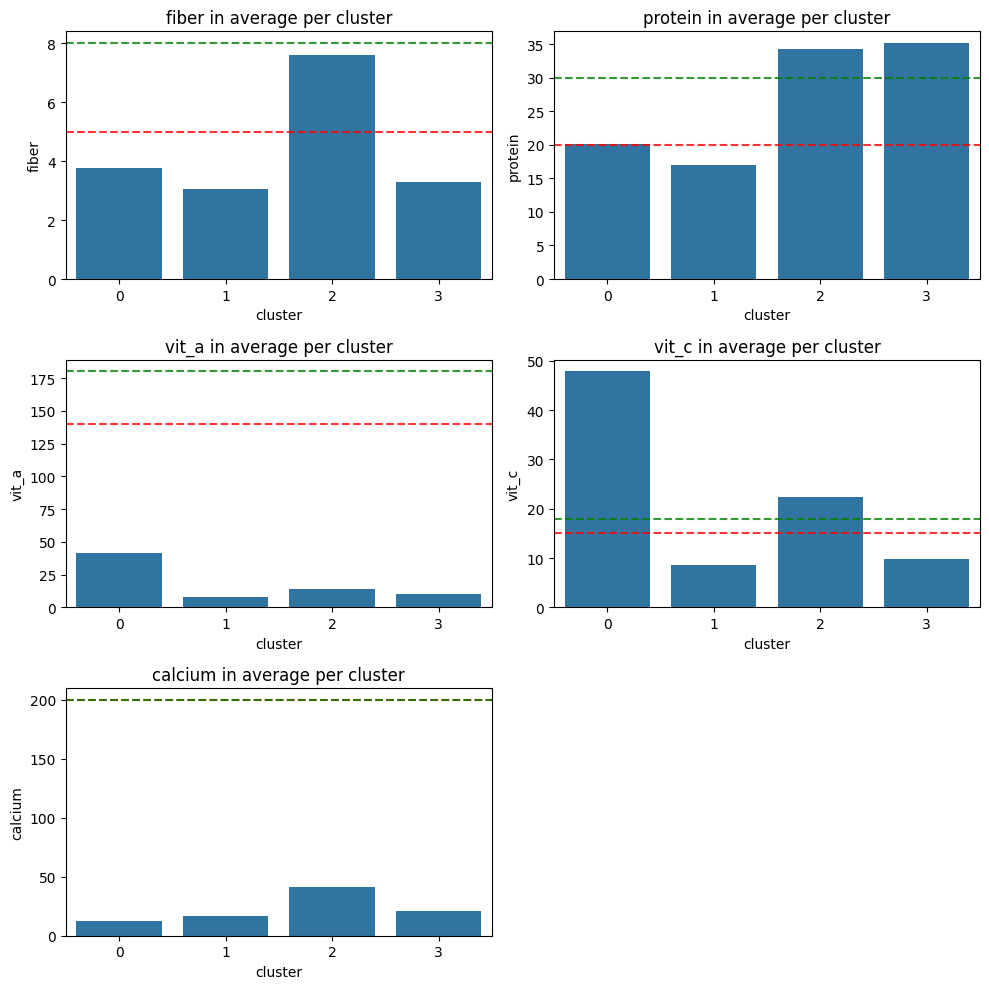

In [639]:
H_nut_facts = ['fiber', 'protein', 'vit_a', 'vit_c', 'calcium'] 
male = [8,30,180,18,200]
female = [5,20,140,15,200]


fig,axs = plt.subplots(3,2,figsize=(10,10))
i=0
j=0
for f in H_nut_facts:
    sns.barplot(x=mean_df.index,y=mean_df.loc[:,f],ax=axs[i,j%2])
    axs[i,j%2].axhline(y=female[j], c="r", ls="--", alpha=0.8, label="Women")
    axs[i,j%2].axhline(y=male[j], c="g", ls="--", alpha=0.8, label="Men")
    axs[i,j%2].set(title= f+ " in average per cluster")
    #axs[i].set_ylim([0,75])
    if j%2==1:
        i+=1
    j+=1

for ax in axs.flatten():
    if not ax.has_data(): 
        ax.remove() 
plt.tight_layout()
plt.show()

- Cluster 0 contains meals rich in vitamin C, and on average has a satisfactory protein value that meets women's needs for this nutrient. it has also the second best average value of fiber after Cluster 2. However, the average value of calcium for this cluster are very poor.
-  Cluster 1 is low in healthy nutrients.
-  Meals in cluster 2 are rich in protein and fiber, their vitamin C content is also satisfactory, it exceeded the reference values for men and women. This cluster has the best value of calcium, but a poor value of vitamin A.
-  Meals in cluster 3 are mainly rich in protein but have less satisfying values of fiber. Their vitamin A and C and calcium content are low.

### Unhealthy nutrition factors

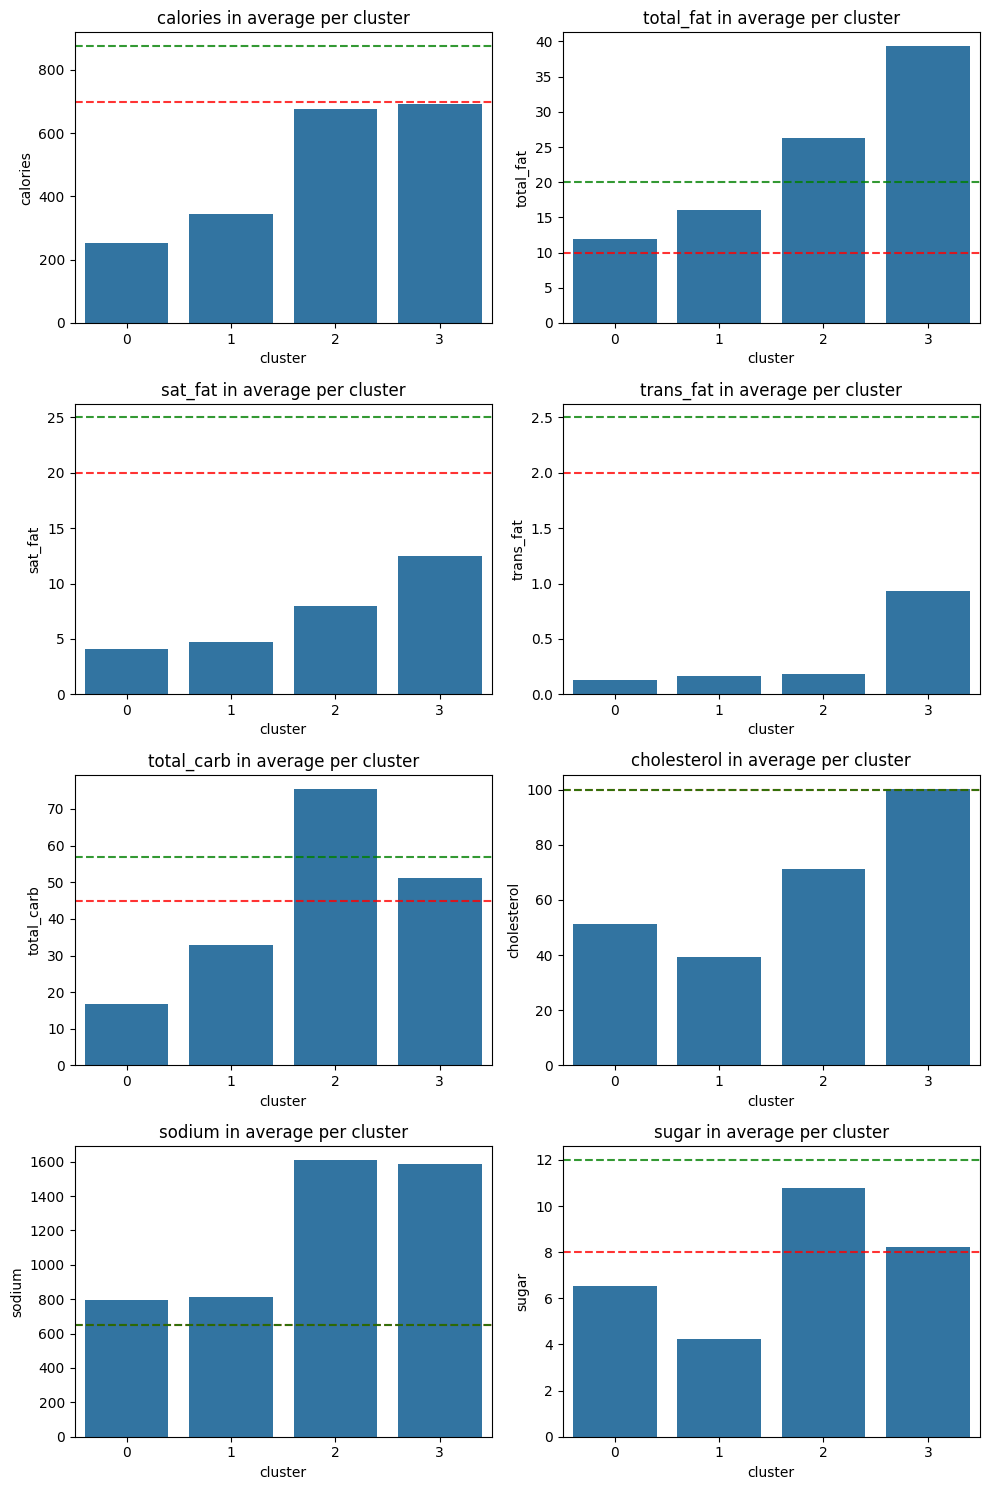

In [621]:
UH_nut_facts = ['calories', 'total_fat', 'sat_fat', 'trans_fat','total_carb', 'cholesterol','sodium','sugar']
male = [875,20,25,2.5,57,100,650,12]
female = [700,10,20,2,45,100,650,8]


fig,axs = plt.subplots(4,2,figsize=(10,15))
i=0
j=0
for f in UH_nut_facts:
    sns.barplot(x=mean_df.index,y=mean_df.loc[:,f],ax=axs[i,j%2])
    axs[i,j%2].axhline(y=female[j], c="r", ls="--", alpha=0.8, label="Women")
    axs[i,j%2].axhline(y=male[j], c="g", ls="--", alpha=0.8, label="Men")
    axs[i,j%2].set(title= f+ " in average per cluster")
    #axs[i].set_ylim([0,75])
    if j%2==1:
        i+=1
    j+=1

for ax in axs.flatten():
    if not ax.has_data(): 
        ax.remove() 
plt.tight_layout()
plt.show()

- Cluster 0 has the lightest meals (the average calories and fats for this cluster are the lowest). However, the sodium content of these meals is high (above the reference value). The amount of cholesterol and sugar are reasonable, they are below the reference lines
- Cluster 1 meals are not too high in calories either but are richer in fats than Cluster 0. Their sodium content is also high and they have the lowest amount of sugar on average.
- Cluster 2 meals are the second highest in calories. These meals' sodium and carbohydrate content are alarming, far exceeding the reference lines. This cluster has the highest sugar value on average. Fats are also high for this cluster, it has the second-highest cholesterol average value.
- Cluster 3 encloses the greasiest meals, most caloric, and has the highest average values of fats, sat fat, trans fat, and cholesterol. The average value of sodium in the meals of this cluster is too high also.

It seems like cluster 0 includes the healthiest meals, let's explore the items of this cluster. We display here the word cloud of the meals' names from Cluster 0.

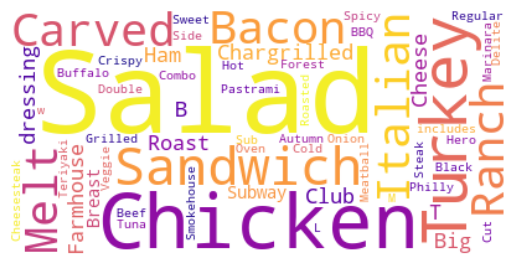

In [623]:
from wordcloud import WordCloud, STOPWORDS

items_cluster0 = df_food.loc[df_food['cluster']==0,'item']
cloud = ''
for item in items_cluster0:
    cloud = cloud + ' ' + item

stopwords = set(STOPWORDS)
cluster0 = WordCloud(background_color='white', colormap='plasma')

# generate the word cloud
cluster0.generate(cloud)

# display the word cloud
plt.imshow(cluster0, interpolation='bilinear')
plt.axis('off')
plt.show()

This cluster is mainly composed of salads with chicken as a source of protein. The vitamin C high content for this cluster could be explained by the presence of dressing as citrus is commonly used. However, the dressing could be also the source of the high level of sodium.  

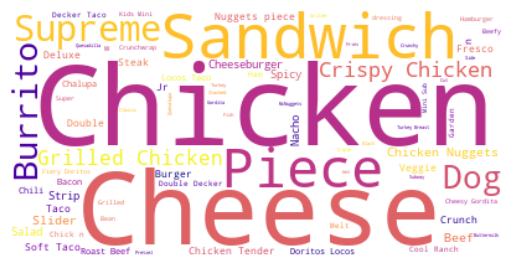

In [625]:
items_cluster1 = df_food.loc[df_food['cluster']==1,'item']
cloud = ''
for item in items_cluster1:
    cloud = cloud + ' ' + item

stopwords = set(STOPWORDS)
cluster1 = WordCloud(background_color='white', colormap='plasma')

# generate the word cloud
cluster1.generate(cloud)

# display the word cloud
plt.imshow(cluster1, interpolation='bilinear')
plt.axis('off')
plt.show()

Cluster 1 is mainly composed of chicken sandwiches and cheese. It is the most common meal in all 8 restaurants.

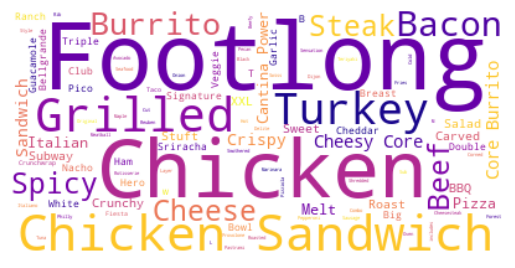

In [627]:
items_cluster2 = df_food.loc[df_food['cluster']==2,'item']
cloud = ''
for item in items_cluster2:
    cloud = cloud + ' ' + item

stopwords = set(STOPWORDS)
cluster2 = WordCloud(background_color='white', colormap='plasma')

# generate the word cloud
cluster2.generate(cloud)

# display the word cloud
plt.imshow(cluster2, interpolation='bilinear')
plt.axis('off')
plt.show()

Meals in cluster 2 contain a variety of meat as we can see chicken, turkey, beef, steak, hence their high protein content. Seasonings and sauces commonly used with meat could be the source of excess sodium and sugar. The word "Grilled" is emphasized here, hence the low level of trans fat for this cluster since we know that fried foods are a source of unhealthy trans fats.

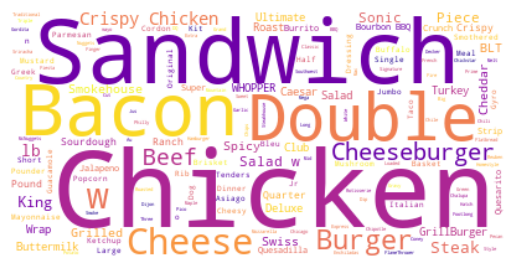

In [629]:
items_cluster3 = df_food.loc[df_food['cluster']==3,'item']
cloud = ''
for item in items_cluster3:
    cloud = cloud + ' ' + item

stopwords = set(STOPWORDS)
cluster3 = WordCloud(background_color='white', colormap='plasma')

# generate the word cloud
cluster3.generate(cloud)

# display the word cloud
plt.imshow(cluster3, interpolation='bilinear')
plt.axis('off')
plt.show()

As expected, cluster 3 has the most meat-rich meals, the word "Double" is emphasized here referring to more than one piece of meat. Meat is a great source of protein but also fats. Saturated and trans fatty acids in this cluster are the highest of the other clusters, which could be explained by the common use of bacon and deep-frying (the word "Crispy" stands out in the word cloud and generally refers to fried foods).

# Recommendations

- Salads should contain more fiber-rich vegetables and more calcium-containing nutrients like cheese. Salads should contain less sodium, which may mean rethinking salad dressings for example.
- Chicken sandwich recipes should be revised to include more healthy nutrients such as fiber, vitamins A and C, and calcium.
- Sodium and sugar levels in meat seasoning and sauces should be monitored.
- Promote more recipes based on grilled rather than fried foods